In [95]:
import pandas as pd
from IPython.display import display
from PIL import Image
import seaborn as sns
BASE_TRAIN_PATH = '../../datasets/covid/train'

In [96]:
df_train = pd.read_csv('../../datasets/covid/train.txt',sep=' ')

In [97]:
def dimensiones_imagenes(lista_imagenes):
    dimensiones = {
        'ancho': [],
        'alto': []
    }
    for imagen in lista_imagenes:
        img = Image.open(imagen)
        dimensiones['ancho'].append(img.size[0])
        dimensiones['alto'].append(img.size[1])
    return dimensiones

In [98]:
df_train['path'] = df_train['filename'].apply(lambda x: f'{BASE_TRAIN_PATH}/{x}')
d = dimensiones_imagenes(df_train['path'])
df_train['ancho'] = d['ancho']
df_train['alto'] = d['alto']
df_train.head()

,patient_id,filename,class,data_source,path,ancho,alto
0,379,1e64990d1b40c1758a2aaa9c7f7a85_jumbo.jpeg,negative,cohen,../../datasets/covid/train/1e64990d1b40c1758a2...,1024,912
1,379,7223b8ad031187d9a142d7f7ca02c9_jumbo.jpeg,negative,cohen,../../datasets/covid/train/7223b8ad031187d9a14...,1024,952
2,380,3392dc7d262e28423caca517f98c2e_jumbo.jpeg,negative,cohen,../../datasets/covid/train/3392dc7d262e28423ca...,977,1024
3,380,ec3a480c0926ded74429df416cfb05_jumbo.jpeg,negative,cohen,../../datasets/covid/train/ec3a480c0926ded7442...,1024,902
4,382,a72aeb349a63c79ed24e473c434efe_jumbo.jpg,negative,cohen,../../datasets/covid/train/a72aeb349a63c79ed24...,1024,1024


In [99]:

def redimensionar_y_recortar(ruta_imagen, tamaño_cuadrado):
    imagen = Image.open(ruta_imagen)
    ancho_original, alto_original = imagen.size

    if ancho_original > alto_original:
        escala = tamaño_cuadrado / alto_original
    else:
        escala = tamaño_cuadrado / ancho_original

    nuevo_ancho = int(ancho_original * escala)
    nuevo_alto = int(alto_original * escala)

    imagen_redimensionada = imagen.resize((nuevo_ancho, nuevo_alto), Image.LANCZOS)

    izquierda = (nuevo_ancho - tamaño_cuadrado) // 2
    superior = (nuevo_alto - tamaño_cuadrado) // 2
    derecha = izquierda + tamaño_cuadrado
    inferior = superior + tamaño_cuadrado

    imagen_cortada = imagen_redimensionada.crop((izquierda, superior, derecha, inferior))
    return imagen_cortada



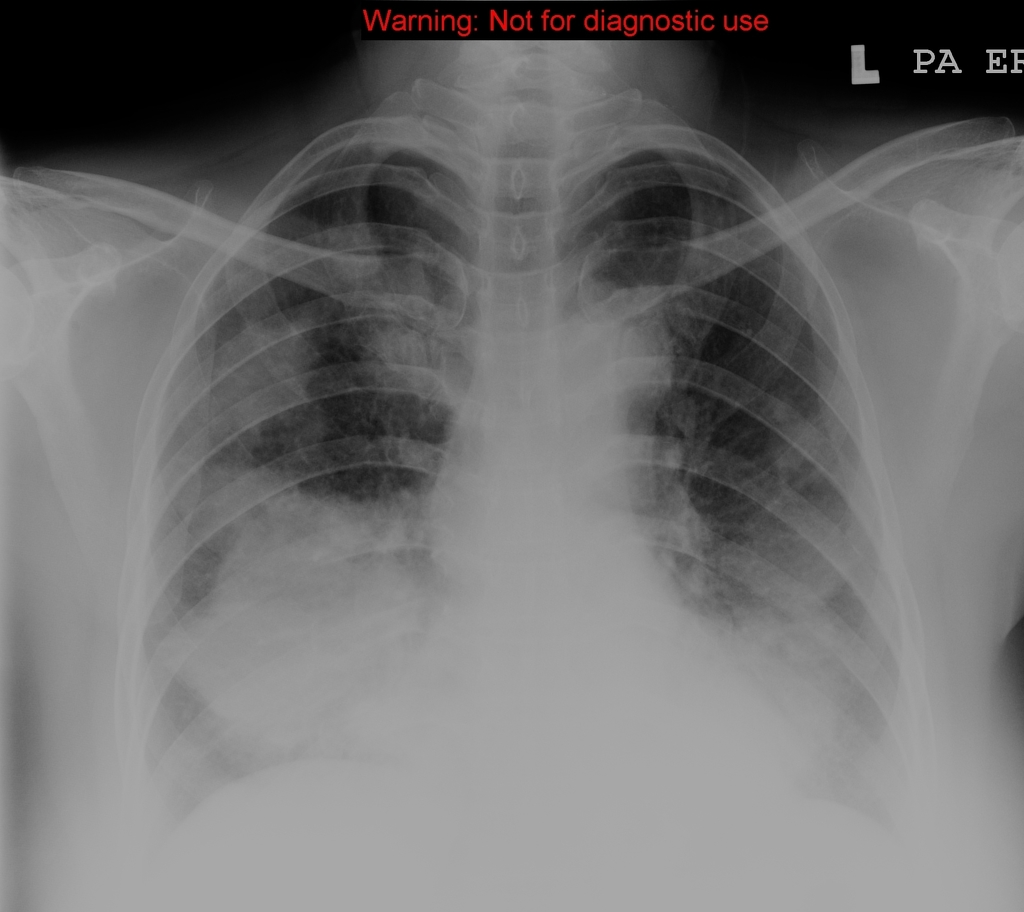

In [100]:
primer_imagen = df_train['path'].iloc[0]
img_normal = Image.open(primer_imagen)
display(img_normal)

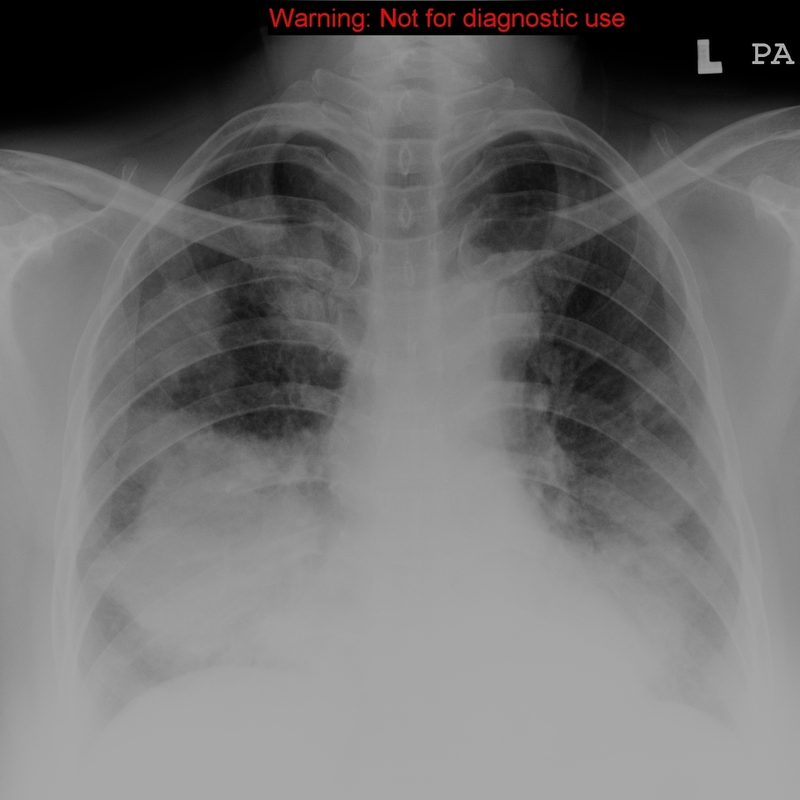

In [101]:
imagen_redimensionada = redimensionar_y_recortar(primer_imagen, 800)
display(imagen_redimensionada)

<Axes: xlabel='ancho', ylabel='Count'>

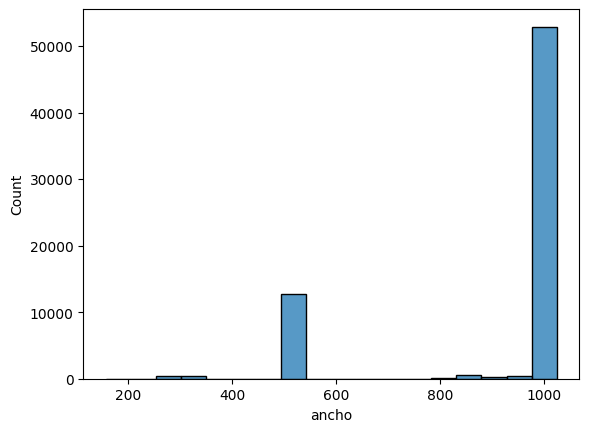

In [102]:
sns.histplot(data=df_train, x='ancho',bins=10)

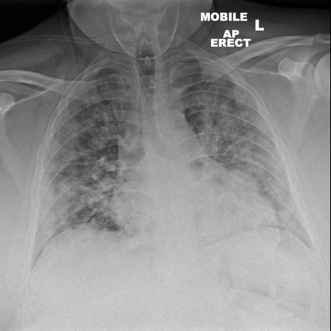

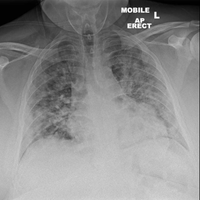

In [106]:
imagenes_pequenias = df_train[df_train['ancho'] < 400]
random_img = imagenes_pequenias.sample(1)
path = random_img['path'].values[0]
imagen = Image.open(path)
display(imagen)
display(redimensionar_y_recortar(path, 200))